# Đồ Án Lập Trình cho Khoa Học Dữ Liệu

## Thành viên
| Mã số sinh viên | Học và tên                                           |
|:---------------:|:-----------------------------------------------------|
|18120225         | [Trần Thanh Phúc](https://github.com/PhucThanh)      |
|18120221         | [Nguyễn Điền Thanh Phong](https://github.com/sgrayk) |

---

## Môi trường code

In [411]:
!which python 

/home/workspace/miniconda3/envs/p4ds-env/bin/python


---

## Các thư viện sử dụng

In [412]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

---

## Thu thập dữ liệu

TV Shows and Movies listed on Netflix

Dataset này bao gồm tv shows và movies khả dụng trên Netflix của năm 2019. Tập dữ liệu được thu thập từ Flixable, một công cụ tìm kiếm Netflix của bên thứ ba.

Vào năm 2018, họ đã phát hành một báo cáo thú vị cho thấy số lượng chương trình truyền hình trên Netflix đã tăng gần gấp ba lần kể từ năm 2010. Số lượng phim của dịch vụ phát trực tuyến đã giảm hơn 2.000 tựa kể từ năm 2010, trong khi số lượng chương trình truyền hình của nó tăng gần gấp ba lần. Sẽ rất thú vị khi khám phá xem tất cả những thông tin chi tiết khác có thể thu được từ cùng một tập dữ liệu.


---

## Khám phá dữ liệu

### Đọc dữ liệu từ file csv vào dataframe

In [413]:
netflix_df = pd.read_csv('./datasheet/netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Số dữ liệu và số cột trong Dữ liệu

In [414]:
num_rows = netflix_df.shape[0]
num_cols = netflix_df.shape[1]

print("Số dữ liệu trong DataFrame: ", num_rows)
print("Số cột dữ liệu trong DataFrame: ", num_cols)

Số dữ liệu trong DataFrame:  7787
Số cột dữ liệu trong DataFrame:  12


### Kiểm tra sự trùng lặp trong dữ liệu

In [415]:
have_duplicated_rows = np.sum(netflix_df.duplicated(keep=False)) != 0

print("Dữ liệu có bị trùng lặp: ", have_duplicated_rows)

Dữ liệu có bị trùng lặp:  False


### Ý nghĩa mỗi cột trong Dữ liệu

- **show_id**: các giá trị đơn lập giúp xác định một Chương trình.
- **type**: loại chương trình của Netflix, là Movie hoặc TV Show.
- **title**: tên chương trình được phát trên Netflix.
- **director**: đạo diễn chương trình
- **cast**: danh sách các diễn viên trong Chương trình, ngăn cách bởi dấu ","
- **country**: tên nước sản xuất 
- **date_added**: thời gian được thêm vào Netflix
- **release_year**: năm sản xuất chương trình
- **rating**: đánh giá phim thuộc thể loại nào và mức độ của nó
- **duration**: thời lượng chương trình, có thể kéo dài trong hơn một mùa,...
- **listed_in**: danh sách thể loại chương trình
- **description**: mô tả chương trình

### Kiểm tra loại dữ liệu của mỗi cột có đơn nhất không?

In [416]:
col_dtypes = netflix_df.dtypes

col_dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

**Kiểm tra kiểu thật sự của những cột có dtype là Object**

`netflix_df` có 11 cột có `dtype` là `object`: "show_id", "type", "title", "director", "cast", "country", "date_added", "rating", "duration", "listed_in", "description". Ta sẽ kiểm tra nội bộ mỗi cột này thực sự là các kiểu dữ liệu nào.

In [417]:
def open_object_dtype(s):
    
    dtypes = set(s.apply(type))
    
    return dtypes

for col in netflix_df.columns:
    print("Column %12s có kiểu dữ liệu: %s" % (col, open_object_dtype(netflix_df[col])))

Column      show_id có kiểu dữ liệu: {<class 'str'>}
Column         type có kiểu dữ liệu: {<class 'str'>}
Column        title có kiểu dữ liệu: {<class 'str'>}
Column     director có kiểu dữ liệu: {<class 'str'>, <class 'float'>}
Column         cast có kiểu dữ liệu: {<class 'str'>, <class 'float'>}
Column      country có kiểu dữ liệu: {<class 'str'>, <class 'float'>}
Column   date_added có kiểu dữ liệu: {<class 'str'>, <class 'float'>}
Column release_year có kiểu dữ liệu: {<class 'int'>}
Column       rating có kiểu dữ liệu: {<class 'str'>, <class 'float'>}
Column     duration có kiểu dữ liệu: {<class 'str'>}
Column    listed_in có kiểu dữ liệu: {<class 'str'>}
Column  description có kiểu dữ liệu: {<class 'str'>}


**Vấn đề cần tiền xử lý:**
Theo thông tin ta nhận được ở trên, ta có những đánh giá sau: 
- Cột "date_added" đang có dtype là `str` và `float`. Để đúng về ý nghĩa, ta sẽ thực hiện bước tiền xử lý là chuyển sang dạng `datetime`.
- Cột "director", "country" và "rating" có dtype gồm 2 loại là `str` và `float`, ta sẽ tiền xử lý để thống nhất `dtype` là `str` 
- Cột "cast" có dtype gồm 2 loại là `str` và `float`, ta sẽ tiền xử lý để thống nhất `dtype` là `str` rồi sau đó chuyển thành danh sách.
- Hầu hết các cột có giá trị `float` là vì các cột có giá trị `nan`

---

## Tiền xử lý

### Xử lý cột `date_added`

**Kiểm tra tỷ lệ mất mát dữ liệu:**
- Do cột có các cột có giá trị nan nên ta sẽ xem xét tỷ lệ này có ảnh hưởng gì đễn dữ liệu không

In [418]:
def fMissingRatio(name_col):
    print("Tỷ lệ mất mát dữ liệu của cột %s là %3.3f." % (name_col, round(netflix_df[name_col].isna().mean() * 100,3)))
    
fMissingRatio('date_added')

Tỷ lệ mất mát dữ liệu của cột date_added là 0.128.


**Giải quyết:**
- Do cột có các cột có giá trị nan và **các dòng dữ liệu không liên quan tới nhau** cộng thêm tỷ lệ mất mát nhỏ nên ta sẽ loại bỏ chúng và dữ liệu không bị ảnh hưởng.

In [419]:
netflix_df.dropna(subset = ['date_added'], inplace=True)
print("Số dòng dữ liệu: ", netflix_df.shape)
fMissingRatio('date_added')

Số dòng dữ liệu:  (7777, 12)
Tỷ lệ mất mát dữ liệu của cột date_added là 0.000.


**Kiểm tra:**
- Vậy DataFrame trên cột `date_added` đã sạch.

**Chuyển dtype của cột "date_added" sang datetime**

In [420]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'].apply(str.strip), format='%B %d, %Y')

open_object_dtype(netflix_df['date_added'])

{pandas._libs.tslibs.timestamps.Timestamp}

### Xử lý cột `listed_in`

**Chuyển dtype của cột "listed_in" sang `numpy array`**

Ta sẽ dùng numpy array để quản lý danh sách thể loại cho từng phim hoặc chương trình 

In [421]:
netflix_df['listed_in'] = np.array(netflix_df['listed_in'].str.split(pat=', '))

### Xử lý cột `cast`

**Chuyển dtype của cột "cast" sang str**

Vì `dtype` các cột trên đều là `str` và `nan`, do đó ta không nên chuyển một lần sang một List cho nên ta sẽ chuyển sang `str` trước với việc thay thế các giá trị `nan` trong các cột với chuỗi rỗng.

In [422]:
netflix_df['cast'] = netflix_df['cast'].replace(to_replace=np.nan, value="")

**Chuyển dtype của cột "cast" sang `numpy array`**

Sau khi cột `cast` tương đối đồng nhất kiểu, ta sẽ chuyển sang `numpy array` để quản lý tốt hơn.

In [423]:
netflix_df['cast'] = np.array(netflix_df['cast'].str.split(pat=', '))

### Xử lý các cột `director`, `country` và `rating`

**Chuyển dtype của cột "director", "country" và "rating" sang str**

Vì `dtype` các cột trên đều là `str` và `nan` nên khi chuyển sang `str`, ta sẽ thay thế các giá trị `nan` trong các cột với chuỗi rỗng.

In [424]:
netflix_df['director'] = netflix_df['director'].replace(to_replace=np.nan, value="").apply(str.strip)
netflix_df['country'] = netflix_df['country'].replace(to_replace=np.nan, value="").apply(str.strip)
netflix_df['rating'] = netflix_df['rating'].replace(to_replace=np.nan, value="").apply(str.strip)

### Kiểm tra tính đồng nhất kiểu dữ liệu trong DataFrame 

In [425]:
for col in netflix_df.columns:
    print("Column %12s có kiểu dữ liệu: %s" % (col, open_object_dtype(netflix_df[col])))

Column      show_id có kiểu dữ liệu: {<class 'str'>}
Column         type có kiểu dữ liệu: {<class 'str'>}
Column        title có kiểu dữ liệu: {<class 'str'>}
Column     director có kiểu dữ liệu: {<class 'str'>}
Column         cast có kiểu dữ liệu: {<class 'list'>}
Column      country có kiểu dữ liệu: {<class 'str'>}
Column   date_added có kiểu dữ liệu: {<class 'pandas._libs.tslibs.timestamps.Timestamp'>}
Column release_year có kiểu dữ liệu: {<class 'int'>}
Column       rating có kiểu dữ liệu: {<class 'str'>}
Column     duration có kiểu dữ liệu: {<class 'str'>}
Column    listed_in có kiểu dữ liệu: {<class 'list'>}
Column  description có kiểu dữ liệu: {<class 'str'>}


Vậy các `dtype` của các cột trên đều đồng nhất, không có 2 kiểu dữ liệu trên cùng một cột.

### Kiểm tra tỷ lệ mất mát dữ liệu trong DataFrame 

In [426]:
for col in netflix_df.columns:
    fMissingRatio(col)

Tỷ lệ mất mát dữ liệu của cột show_id là 0.000.
Tỷ lệ mất mát dữ liệu của cột type là 0.000.
Tỷ lệ mất mát dữ liệu của cột title là 0.000.
Tỷ lệ mất mát dữ liệu của cột director là 0.000.
Tỷ lệ mất mát dữ liệu của cột cast là 0.000.
Tỷ lệ mất mát dữ liệu của cột country là 0.000.
Tỷ lệ mất mát dữ liệu của cột date_added là 0.000.
Tỷ lệ mất mát dữ liệu của cột release_year là 0.000.
Tỷ lệ mất mát dữ liệu của cột rating là 0.000.
Tỷ lệ mất mát dữ liệu của cột duration là 0.000.
Tỷ lệ mất mát dữ liệu của cột listed_in là 0.000.
Tỷ lệ mất mát dữ liệu của cột description là 0.000.


Như vậy, dữ liệu đã gần như không còn giá trị trống. 

---

## Khám phá dữ liệu (tiếp tục)

### Với mỗi cột có kiểu dữ liệu dạng numeric, ta cần xem xét sự phân bố các giá trị

Ta sẽ xếp các cột `date_added` vào nhóm numeric, do đó hiện có 2 cột thuộc nhóm numeric: "release_year", "date_added".

Với mỗi cột numeric ta sẽ xem những thông tin mô tả dữ liệu.   

In [427]:
nume_col_profiles_df = netflix_df.loc[:,['release_year', 'date_added']] \
                                 .agg([lambda x: pd.Series.describe(x, datetime_is_numeric=True)])

nume_col_profiles_df.columns = ['release_year', 'date_added']

nume_col_profiles_df

,release_year,date_added
count,7777.000000,7777
mean,2013.935965,2019-01-02 19:20:57.708627968
std,8.760694,NaN
min,1925.000000,2008-01-01 00:00:00
25%,2013.000000,2018-02-01 00:00:00
50%,2017.000000,2019-03-08 00:00:00
75%,2018.000000,2020-01-20 00:00:00
max,2021.000000,2021-01-16 00:00:00


Dựa vào bảng giá trị, ta có những nhận xét sơ như sau:
- Nextflix đã thêm những chương trình được sản xuất vào năm 1925 dù bộ phim đầu tiên năm 1895 và Netflix được ra đời năm 1997, vậy thì tại sao Netflix lại chọn bộ phim cũ như vậy?  
- Dữ liệu cuối cùng là năm 2021, có thể người thu thập chỉ cập nhật chọn thời điểm 2008 - 2021 nên dữ liệu có vẻ không đầy đủ. 
- Mức 25% là năm 2013, trong khi 0% là 1925, vậy những bộ phim hay chương trình vào thời điểm trước 2013 khá hạn chế, có thể sau năm 2013 thì Netflix phát triển mạnh lên.
- Trên mỗi mức, ta thấy thời gian khá chênh lệch, có thể Netflix chờ những bộ phim dài tập hoặc chương hoàn tất thì Netflix mới thêm bộ phim hay chương trình vào Netflix. Còn mức 100%, cả 2 cùng năm 2021, có thể chương trình mới nhất là một TV Show.

**Kiểm tra:**
- Trên là 2 cột numeric nhưng chúng là có liên hệ với nhau, thông thường cột `release_year` sẽ phải có giá trị nhỏ hơn `date_added` theo như ta phỏng đoán, Netflix chờ phim sản xuất xong thì mới thêm vào kho dữ liệu, điều này có đúng không?

In [428]:
netflix_df.loc[netflix_df['date_added'].dt.year < netflix_df['release_year'],['type','title','date_added','release_year']]

,type,title,date_added,release_year
583,TV Show,Arrested Development,2018-05-29,2019
1025,TV Show,BoJack Horseman,2019-10-25,2020
2311,TV Show,Fuller House,2019-12-06,2020
2602,Movie,Hans Teeuwen: Real Rancour,2017-07-01,2018
2741,TV Show,Hilda,2020-12-14,2021
2981,Movie,Incoming,2018-10-26,2019
3098,TV Show,Jack Taylor,2013-03-31,2016
3926,TV Show,Maradona in Mexico,2019-11-13,2020
5493,TV Show,Sense8,2016-12-23,2018
6462,TV Show,The Hook Up Plan,2019-10-11,2020


**Kết luận:**
- Đối với những dữ liệu TV Show, sau khi kiểm tra, có vẻ Netflix chọn thời điểm ra mắt là tập cuối của phim, do đó, ngày phát hành sẽ là ngày sau khi thêm vào Netflix.
- Đối với những dữ liệu Movie, khi kiểm tra trên Google, thời điểm ra mắt lại trước thời điểm thêm vào Netflix một năm, thay vì là sau một năm, chắc có lỗi trong lúc Crawl dữ liệu của người tạo dữ liệu này hoặc do người thống kê làm sai. 

**Chỉnh sửa**
- Đối với những dữ liệu TV Show, ta đồng ý với sai số này. 
- Đối với những dữ liệu Movie, ta sẽ giảm thời gian ở cột `release_year` trước thời gian ở cột `date_added` một năm. 

In [429]:
movie_df = netflix_df.loc[(netflix_df['date_added'].dt.year < netflix_df['release_year']),['type','title','date_added','release_year']] \
          .loc[netflix_df['type'] == 'Movie',:]

movie_df['release_year'] = movie_df['date_added'].dt.year - 1

movie_df

,type,title,date_added,release_year
2602,Movie,Hans Teeuwen: Real Rancour,2017-07-01,2016
2981,Movie,Incoming,2018-10-26,2017


### Với mỗi cột có kiểu dữ liệu dạng categorical, ta cần xem xét sự phân bố các giá trị

`netflix_df` có 9 cột categorical là "show_id", "type", "title", "director", "country", "rating", "duration", "listed_in" và "description".

Với mỗi cột categorical, ta sẽ xem xét số lượng giá trị khác nhau, list/array các giá trị khác nhau.

`cast` không liệt vô dữ liệu nào hết vì nó như là một danh sách nhỏ. 

In [518]:
cate_col_profiles_df = netflix_df.loc[:,['show_id','type','title','country','rating','duration','listed_in','description']] \
                                 .agg([pd.Series.nunique, pd.Series.unique])

cate_col_profiles_df.index = ['num_diff_vals','diff_vals']

cate_col_profiles_df

# cate_col_profiles_df = netflix_df.loc[:,['show_id']].re#.agg([pd.Series.nunique, pd.Series.unique])

# cate_col_profiles_dfi

# netflix_df.loc[:,['director']]#.agg([pd.Series.nunique, pd.Series.unique])

# cate_col_profiles_df
# netflix_df

,show_id,type,title,country,rating,duration,description
num_diff_vals,7777,2,7777,682,15,216,7759
diff_vals,"[s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11,...","[TV Show, Movie]","[3%, 7:19, 23:59, 9, 21, 46, 122, 187, 706, 19...","[Brazil, Mexico, Singapore, United States, Tur...","[TV-MA, R, PG-13, TV-14, TV-PG, NR, TV-G, TV-Y...","[4 Seasons, 93 min, 78 min, 80 min, 123 min, 1...",[In a future where the elite inhabit an island...


Dựa vào bảng giá trị, ta có những nhận xét sơ như sau:
- `show_id` có đủ 7777 giá trị, điều này có thể thấy bình thường.
- `type` gồm 2 loại là TV Show và Movie, đúng như ta đã nói ban đầu, không có gì kỳ lạ.
- `title` gồm 7777 tên đơn lập, đúng như mô tả của người lập ra Dataset này. 
- `description` chỉ có 7759 giá trị thay vì 7777, khá kì lạ khi mô tả phải khác nhau khi tên chương trình và phim khác nhau. 
- `duration` có 216 giá trị, nhưng có thể trích rút ra đơn vị tính từ cột này và tiếp tục khám phá dữ liệu. 
- Có 15 mức độ đánh giá của bảng dữ liệu này được rút ra từ cột `rating`, nhìn sơ thì prefix là TV có thể nghĩ là chỉ TV Show, tuy nhiên không phải, có thể không rút thêm nhiều từ cột này. 
- Từ cột `country`, ta thấy 682 nước có chương trình và bộ phim trong data của Netflix, có thể dùng để lọc và nhóm phim cho phần phân tích dữ liệu.
- Những cột khác không có gì đặc biệt.

In [431]:
netflix_df['description'].value_counts()

A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.                3
Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection.    3
An affable, newly appointed college warden proves to be no ordinary man when an old enemy resurfaces and exposes his complicated, violent past.             2
An aspiring musician battles age-old caste divides to be able to learn the art of a classical instrument from a traditionalist, veteran percussionist.      2
A young Han Solo tries to settle an old score with the help of his new buddy Chewbacca, a crew of space smugglers and a cunning old friend.                 2
                                                                                                                                                           ..
When a 17-year-old learns the TV news host she pines

Có vẻ cột `description` là do bên Netflix tạo trùng, có vẻ vậy,...

### Từ cột mang danh sách `listed_in`, ta sẽ tìm hiểu xem có tất cả bao nhiêu thể loại trên Netfix

Vì dữ liệu thể loại được lưu dưới dạng danh sách, nên ta sẽ cần khám phá xem có thực sự bao nhiêu thể loại riêng biệt trên Netflix. 

<AxesSubplot:title={'center':'Biểu đồ cho thấy số lượng tương ứng thể loại'}, xlabel='Thể loại', ylabel='Số lượng'>

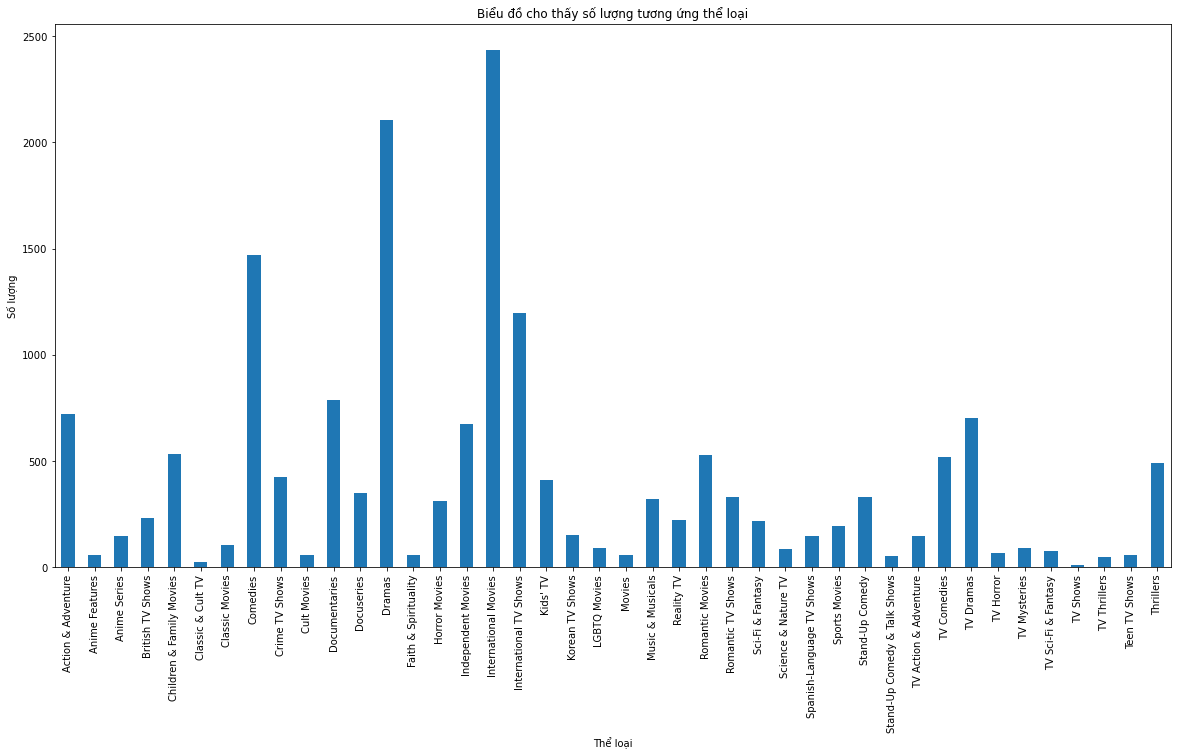

In [432]:
all_movie_genre, count = np.unique(np.sum(netflix_df['listed_in']), return_counts=True,)
all_movie_genre_df = pd.DataFrame(data=count, index=all_movie_genre, columns=['Count'])
all_movie_genre_df.plot.bar(xlabel='Thể loại', ylabel='Số lượng', legend=False, 
                            title='Biểu đồ cho thấy số lượng tương ứng thể loại', figsize=(20,10))

**Nhận xét**
- Có rất nhiều sự chênh lệch giữa các cột, nhưng ta cũng nhận ra có vài dữ liệu bị trùng lặp, ví dụ TV Comedies và Comedies, TV Dramas và Dramas, TV Thrillers và Thriller. Liệu những thể loại không có chữ TV trong tên là phim và ngược lại, là chương trình TV?

**Kiểm chứng**
Trong phần này, ta sẽ có các việc cần làm như sau:
- Tỉ lệ về số lượng giữa Movie và TV Show
- Kiểm chứng trong thể loại phim, không có từ TV và ngược lại

/home/workspace/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:title={'center':'Biểu đồ số lượng tương ứng thể loại TV Show'}, xlabel='Thể loại', ylabel='Số lượng'>

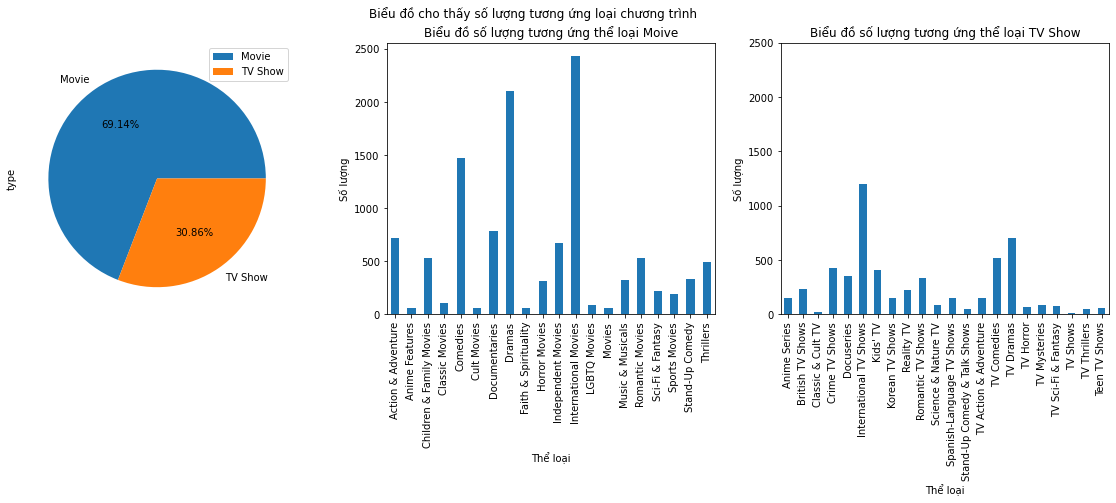

In [433]:
fig, axs = plt.subplots(1,3, figsize=(20, 5))

all_type_df = pd.DataFrame(netflix_df['type'].value_counts())
all_type_df.plot.pie(legend=True, title='Biểu đồ cho thấy số lượng tương ứng loại chương trình', 
                     subplots=True,autopct='%1.2f%%', ax=axs[0])

movie_type_netflix_df = netflix_df.loc[netflix_df['type'] == 'Movie',['type','listed_in']]
movie_type_netflix_df, count = np.unique(np.sum(movie_type_netflix_df['listed_in']), return_counts=True,)
movie_type_netflix_df = pd.DataFrame(data=count, index=movie_type_netflix_df, columns=['Count'])
movie_type_netflix_df.plot.bar(xlabel='Thể loại', ylabel='Số lượng', legend=False, 
                            title='Biểu đồ số lượng tương ứng thể loại Moive', ax=axs[1])

tvshow_type_netflix_df = netflix_df.loc[netflix_df['type'] == 'TV Show',['type','listed_in']]
tvshow_type_netflix_df, count = np.unique(np.sum(tvshow_type_netflix_df['listed_in']), return_counts=True,)
tvshow_type_netflix_df = pd.DataFrame(data=count, index=tvshow_type_netflix_df, columns=['Count'])
tvshow_type_netflix_df.plot.bar(xlabel='Thể loại', ylabel='Số lượng', legend=False, 
                            title='Biểu đồ số lượng tương ứng thể loại TV Show', ax=axs[2], ylim=(0,2500))


**Nhận xét**
- Có vẻ đúng như nhận xét, việc thêm từ TV hay TV show có vẻ sẽ dễ hiểu hơn, nhưng có thừa quá không nhỉ? 

### Từ cột mang danh sách `cast`, ta sẽ tìm hiểu xem có tất cả bao nhiêu diễn viên trên Netfix

In [434]:
cast_netflix_df, count = np.unique(np.sum(netflix_df['cast']), return_counts=True,)
cast_netflix_df = pd.DataFrame(data=count, index=cast_netflix_df, columns=['Count']).drop(labels="",)

cast_netflix_df.describe()

,Count
count,32847.000000
mean,1.701403
std,1.739237
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,42.000000


**Nhận xét**
- Từng có 35338 diễn viên, nghệ sĩ tham gia vào những bộ phim hoặc chương trình TV trên Netflix. 
- Trung bình các diễn viên, nghệ sĩ chỉ tham gia chưa tới 2 lần, thế nhưng lại có người tham gia đến 38 lần (số ít), phải chăng là những người MC không nhờ.
- Hơn 50% diễn viên, nghệ sĩ là chỉ tham gia 1 lần

In [435]:
# cast_netflix_df[cast_netflix_df['Count'] == 38]

cast_netflix_df['Count'].sort_values(ascending=False,).head(10)

Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    30
Om Puri             30
Akshay Kumar        29
Takahiro Sakurai    29
Yuki Kaji           27
Boman Irani         27
Paresh Rawal        27
Amitabh Bachchan    27
Name: Count, dtype: int64

**Nhận xét**
- 8/10 người tham gia là người Ấn Độ, 2 người còn lại là người Nhật, phải chăng người cung cấp dữ liệu là người Ấn Độ hay phim Ấn Độ chiếm nhiều nhất?

 ### Phân tách cột `duration` 

In [436]:
netflix_df.loc[netflix_df['type'] == 'Movie',['type', 'duration']].sample(10)

,type,duration
1611,Movie,91 min
2688,Movie,86 min
1251,Movie,60 min
4523,Movie,54 min
5671,Movie,84 min
2445,Movie,103 min
3237,Movie,123 min
119,Movie,96 min
6256,Movie,112 min
7427,Movie,76 min


In [437]:
netflix_df.loc[netflix_df['type'] == 'TV Show',['type', 'duration']].sample(10)

,type,duration
322,TV Show,1 Season
1640,TV Show,6 Seasons
3821,TV Show,1 Season
4102,TV Show,2 Seasons
1529,TV Show,2 Seasons
2504,TV Show,5 Seasons
6582,TV Show,1 Season
5026,TV Show,1 Season
3077,TV Show,1 Season
2645,TV Show,1 Season


**Nhận xét**
- Trong cột `duration` có 2 thành phần là độ lớn và đơn vị, ta sẽ tách chúng thành 2 cột là `duration_long` và `duration_long_unit`. Mục đích việc tách ra như vậy ta sẽ hỗ trợ việc lọc phim hoặc gợi ý phim sau này.  
- Sau khi lấy 10 mẫu ngẫu nhiên của 2 loại chương trình trên Netflix là Movie và TV Show, hình như đơn vị:
    + Movie có vẻ là min - nghĩa là thời lượng phim, thường thì nếu tính thời gian là phút thì đây là phim lẻ, vậy liệu Netflix xem phim bộ, hay phim bộ được tính là TV Show. Đối với những phim nhiều Season thì như nào nhỉ?
    + TV Show có thể có đơn vị tính là Seasons, điều này khá hợp lý.
    + Liệu có những đơn vị khác nữa không?

In [438]:
unit_series = netflix_df['duration'].str.extract(r'([a-zA-Z]+)', expand=False)
unit_series.name = 'duration_unit'

long_series = netflix_df['duration'].str.extract(r'([0-9]+)', expand=False).astype(np.int32)
long_series.name = 'duration_long'

netflix_discov_df = pd.concat([netflix_df, long_series, unit_series], axis=1)
netflix_discov_df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_long,duration_unit
7544,s7545,TV Show,WHAT / IF,,"[Renée Zellweger, Jane Levy, Blake Jenner, Kei...",United States,2019-05-24,2019,TV-MA,1 Season,"[TV Dramas, TV Thrillers]",Desperate to secure funding for her med tech s...,1,Season
6039,s6040,Movie,Thackeray (Hindi),Abhijit Panse,"[Nawazuddin Siddiqui, Amrita Rao, Rajeev Panda...",India,2020-06-26,2019,TV-14,135 min,"[Dramas, International Movies]",From controversial cartoonist to powerful Mumb...,135,min
2894,s2895,TV Show,I Am Me!,,"[Germán Bracco, Daniela Luque, José Antonio Be...",Mexico,2017-03-03,2016,TV-14,1 Season,"[International TV Shows, Spanish-Language TV S...",Aspiring hip-hop star Francisco builds a name ...,1,Season
4968,s4969,Movie,Pretville,Linda Korsten,"[Marlee van der Merwe, Eugene Jensen, Marno va...",South Africa,2020-02-20,2012,TV-PG,95 min,"[Comedies, International Movies, Music & Music...",A farm boy and a greaser pluck at the heartstr...,95,min
6482,s6483,TV Show,The InBESTigators,,"[Abby Bergman, Anna Cooke, Aston Droomer, Jami...",Australia,2020-01-10,2020,TV-Y,2 Seasons,"[Kids' TV, TV Comedies]",Four clever school kids start their own detect...,2,Seasons


**Kiểm tra**
- Liệu đơn vị `min` chỉ dành cho `Movie` và `Season` chỉ dành cho `TV Show`?  
- Liệu có những đơn vị khác nữa không?

In [439]:
netflix_discov_df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_long,duration_unit
1669,s1670,TV Show,Death by Magic,,[Drummond Money-Coutts],United States,2018-11-30,2018,TV-PG,1 Season,[Reality TV],Magician Drummond Money-Coutts travels the glo...,1,Season
1124,s1125,TV Show,Buddha,,"[Himanshu Soni, Kajal Jain, Sanket Choukse, Ka...",,2018-04-01,2013,TV-PG,1 Season,"[International TV Shows, TV Dramas]","In this historical drama series, young Prince ...",1,Season
1217,s1218,Movie,Cargo,Arati Kadav,"[Vikrant Massey, Shweta Tripathi, Nandu Madhav...",India,2020-09-09,2020,TV-14,113 min,"[Comedies, Dramas, Independent Movies]",Aboard a spaceship where souls of the deceased...,113,min
3989,s3990,Movie,Material,Craig Freimond,"[Vincent Ebrahim, Riaad Moosa, Joey Rasdien, D...",South Africa,2020-05-01,2012,TV-14,94 min,"[Comedies, Dramas, International Movies]",A dutiful son must hide his pursuit of stand-u...,94,min
795,s796,Movie,Bebe's Kids,Bruce W. Smith,"[Faizon Love, Vanessa Bell Calloway, Wayne Col...",United States,2019-11-20,1992,PG-13,73 min,[Comedies],"When ladies' man Robin meets Jamika, he falls ...",73,min


**Số lượng các loại `Movie` và `TV Show`**

In [440]:
all_type_df

,type
Movie,5377
TV Show,2400


**Kiểm tra `Movie`**

In [441]:
netflix_discov_df.loc[netflix_discov_df['type'] == 'Movie',['duration_unit']].value_counts()

duration_unit
min              5377
dtype: int64

**Kiểm tra `TV Show`**

In [442]:
netflix_discov_df.loc[netflix_discov_df['type'] == 'TV Show',['duration_unit']].value_counts()

duration_unit
Season           1608
Seasons           792
dtype: int64

**Nhận xét**
- Tổng của chúng là 2400, vậy đối với `TV Show` và `Movie`, chúng chỉ có 2 đơn vị duy nhất lần lượt là `min` và `Season`
- Theo đơn vị của `TV Show`, số lượng các chương trình có 1 mùa nhiều gấp đôi các mùa khác cộng lại. Để có thể duy trì nhiều mùa có vẻ khó, ta sẽ tìm hiểu `TV show` nào nhiều mùa nhất.
- `Movie` chỉ có `min`, do đó có thể kết luận sơ là phim bộ thuộc `TV Show`. Mình có tò mò là phân bố của chúng thế nào và top 1 phim dài nhất và ngắn nhất?


---

**Tiền xử lý `duration_unit` của `TV Show` thành `Season`**
- Theo nhìn nhận ở trên, `Season` và `Season` có ý nghĩa như nhau, do đó, ta không cần phải tách chúng ra làm gì. 


In [443]:
netflix_discov_df.loc[netflix_discov_df['duration_unit'] == 'Seasons',['duration_unit']] = ['Season']

netflix_discov_df.loc[netflix_discov_df['type'] == 'TV Show',['duration_unit']].value_counts()

duration_unit
Season           2400
dtype: int64

**Khám phá dữ liệu thời gian của `Movie`**
- Dữ liệu thời gian không bị mất mát, do đó ta tiến hành phân tích mà không gặp vấn đề gì. 


<AxesSubplot:title={'center':'Biểu đồ số lượng tương ứng thời lượng Moive'}, xlabel='Thời Lượng', ylabel='Số lượng'>

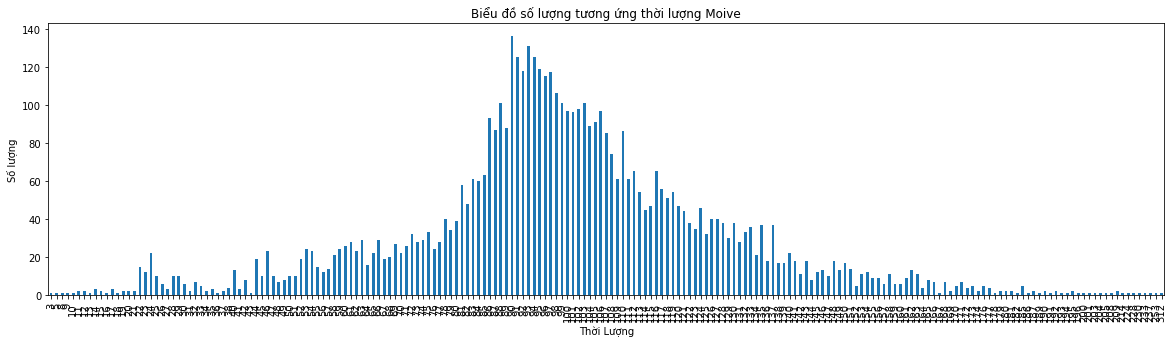

In [450]:
movie_df = pd.DataFrame(netflix_discov_df.loc[netflix_discov_df['type'] == 'Movie',:] \
                                         .groupby('duration_long').size(), columns=['Count']).sort_index()


movie_df.plot.bar(xlabel='Thời Lượng', ylabel='Số lượng', legend=False, 
                            title='Biểu đồ số lượng tương ứng thời lượng Moive', figsize=(20, 5))
# pd.DataFrame.plot.hist()

In [484]:
print(f"Phim có thời lượng ngắn nhất là {movie_df.first_valid_index()} phút với {movie_df.loc[movie_df.first_valid_index(),'Count']} phim")
print(f"Phim có thời lượng dài nhất là {movie_df.last_valid_index()} phút với {movie_df.loc[movie_df.last_valid_index(),'Count']} phim")
print(f"{movie_df.loc[movie_df['Count'] == movie_df.max()[0] ,'Count'].reset_index().iloc[0,0]} phút là thời lượng có nhiều phim nhất")

Phim có thời lượng ngắn nhất là 3 phút với 1 phim
Phim có thời lượng dài nhất là 312 phút với 1 phim
90 là thời lượng có nhiều phim nhất


**Nhận xét**
- Hầu hết các phim lẻ đều chọn khoảng thời gian 90 phút.
- Phim ngắn nhất là 3 phút và dài nhất là 312 phút, khá thú vị, ta sẽ xem xem là phim gì.


In [514]:
amazing_movie = netflix_discov_df.loc[netflix_discov_df['type'] == 'Movie', ['title','duration_long','duration_unit','listed_in', 'country']]
amazing_movie.loc[amazing_movie['duration_long'] == 3,:]
pd.concat([amazing_movie.loc[amazing_movie['duration_long'] == 3,:], amazing_movie.loc[amazing_movie['duration_long'] == 312,:]], axis=0)

,title,duration_long,duration_unit,listed_in,country
5605,Silent,3,min,"[Children & Family Movies, Sci-Fi & Fantasy]",United States
957,Black Mirror: Bandersnatch,312,min,"[Dramas, International Movies, Sci-Fi & Fantasy]",United States


**Khám phá dữ liệu thời gian của `TV Show`**
- Dữ liệu thời gian không bị mất mát, do đó ta tiến hành phân tích mà không gặp vấn đề gì. 


**Nhận xét**
- Thời lượng trung bình là 
- Theo đơn vị của `TV Show`, số lượng các chương trình có 1 mùa nhiều gấp đôi các mùa khác cộng lại. Để có thể duy trì nhiều mùa có vẻ khó, ta sẽ tìm hiểu `TV show` nào nhiều mùa nhất.
- `Movie` chỉ có `min`, do đó có thể kết luận sơ là phim bộ thuộc `TV Show`. Mình có tò mò là phân bố của chúng thế nào và top 5 phim dài nhất và ngắn nhất?


<AxesSubplot:title={'center':'Biểu đồ số lượng tương ứng số mùa của TV Show'}, xlabel='Số mùa', ylabel='Số lượng'>

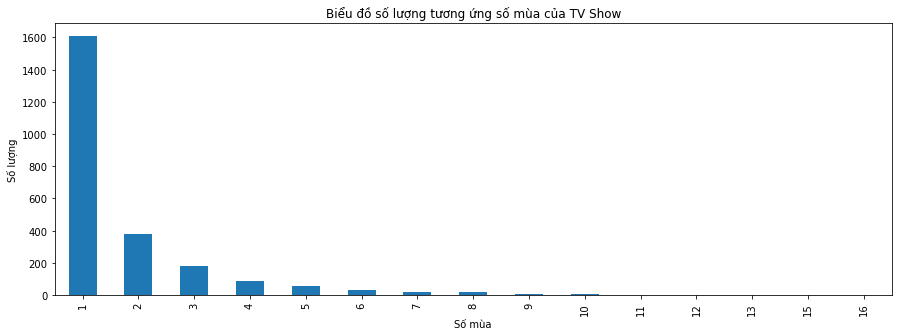

In [506]:
tvshow_df = pd.DataFrame(netflix_discov_df.loc[netflix_discov_df['type'] == 'TV Show',:] \
                                          .groupby('duration_long').size(), columns=['Count'])\
                                          .sort_index(ascending = True)

tvshow_df.plot.bar(xlabel='Số mùa', ylabel='Số lượng', legend=False, 
                            title='Biểu đồ số lượng tương ứng số mùa của TV Show', figsize=(15, 5))

**Nhận xét**
- Gần như các TV Show đều dừng lại ở mùa 1, để tiếp tục hoạt động ở mùa 2 có vẻ khá là khó khăn.
- Từ mùa 2 trở đi, dữ liệu có vẻ giảm dần đều, có thể thấy, một khi bước sang mùa 2, TV Show đó khá là chất lượng và được yêu thích. Có vẻ mùa 1 như là một bộ lọc vậy


**Top 10 TV Show trụ lâu nhất**


In [515]:
tvshow_df = netflix_discov_df.loc[netflix_discov_df['type'] == 'TV Show',['title', 'duration_long', 'duration_unit', 'country', 'listed_in']]\
                             .sort_values(by=['duration_long'], axis=0, ascending=False).head(10)

tvshow_df

,title,duration_long,duration_unit,country,listed_in
2538,Grey's Anatomy,16,Season,United States,"[Romantic TV Shows, TV Dramas]"
5912,Supernatural,15,Season,"United States, Canada","[Classic & Cult TV, TV Action & Adventure, TV ..."
4438,NCIS,15,Season,United States,"[Crime TV Shows, TV Dramas, TV Mysteries]"
1471,COMEDIANS of the world,13,Season,United States,"[Stand-Up Comedy & Talk Shows, TV Comedies]"
1537,Criminal Minds,12,Season,"United States, Canada","[Crime TV Shows, TV Dramas, TV Mysteries]"
7169,Trailer Park Boys,12,Season,Canada,"[Classic & Cult TV, Crime TV Shows, Internatio..."
2678,Heartland,11,Season,Canada,[TV Dramas]
1300,Cheers,11,Season,United States,"[Classic & Cult TV, TV Comedies]"
1597,Danger Mouse: Classic Collection,10,Season,United Kingdom,"[British TV Shows, Kids' TV, TV Comedies]"
5538,Shameless (U.S.),10,Season,United States,"[TV Comedies, TV Dramas]"


**Nhận xét**
- Có vẻ Mỹ và Canada là 2 cường quốc về phim ảnh.
- Những bộ phim hài hay chương trình hài có vẻ dễ tồn tại hơn khi chiếm phần lớn danh sách này.
- Dù trải qua nhiều mùa như vậy, nhưng mình không hề biết tới những phim này, phải chăng danh sách này có thiên vị? 